In [1]:
import sympy as sp
from sympy import lambdify
import numpy as np
import matplotlib.pyplot as plt
from sympy import Matrix

In [2]:
t = sp.symbols('t')
R = sp.symbols('R', positive = True, real = True)
x, y, z, α, dα, ddα, T, κ = sp.symbols('x, y, z, α, dα, ddα, T, κ', cls = sp.Function)
dα_norma = sp.symbols('dα_norma', cls = sp.Function)

In [3]:
def norma(x):
    return sp.sqrt(np.dot(x,x)).simplify()

In [4]:
x = R*sp.cos(t)
y = R*sp.sin(t)
z = 0
α = (x, y, z)
α

(R*cos(t), R*sin(t), 0)

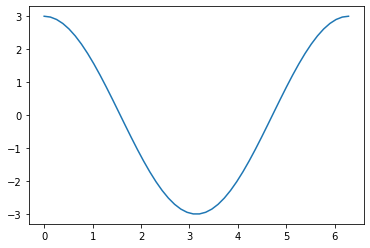

In [5]:
w = np.linspace(0, 2*np.pi)
X = lambdify(t, x.subs(R,3))(w)
plt.plot(w,X)
plt.show()

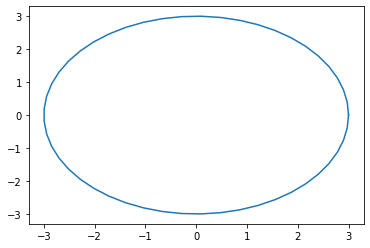

In [6]:
w = np.linspace(0,2*np.pi)
X = lambdify(t, x.subs(R,3))(w)
Y = lambdify(t, y.subs(R,3))(w)
plt.plot(X,Y)
plt.show()

Vector tangente $\alpha$'(t)

In [7]:
dα = (sp.diff(x,t), sp.diff(y,t), sp.diff(z,t))
dα

(-R*sin(t), R*cos(t), 0)

In [8]:
dα_norma = norma(dα)
dα_norma

R

In [9]:
dα_norma.subs(R,1)

1

Vector normal

In [10]:
ddα = (sp.diff(x,t,2), sp.diff(y,t,2), sp.diff(z,t,2))
ddα 

(-R*cos(t), -R*sin(t), 0)

In [11]:
#κ = norma(ddα)
#print(κ)
κ = norma(np.cross(dα,ddα))/dα_norma**3
κ

1/R

In [12]:
u = sp.symbols('u')
S = sp.integrate(sp.sin(u**2),(u,0,t))
C = sp.integrate(sp.cos(u**2),(u,0,t))

In [13]:
α = (S, C)
dα = (sp.diff(S,t), sp.diff(C,t))
dα_norma = norma(dα)
ddα = (sp.diff(S,t,2), sp.diff(C,t,2))
κ = norma(np.cross(dα,ddα))/dα_norma**3
κ.simplify()

2*sqrt(t**2)

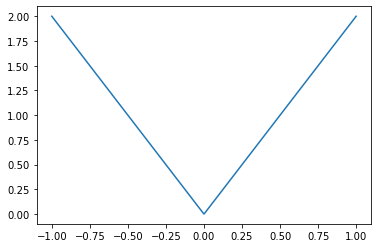

In [14]:
w = np.linspace(-1, 1,1000)
X = lambdify(t, κ)(w)
plt.plot(w,X)
plt.show()

In [15]:
s = sp.symbols('s')
a,b,c = sp.symbols('a,b,c', reals = True, positive = True)


x = a*sp.cos(s/c)
y = a*sp.sin(s/c)
z = b*s/c

α = (x, y, z)

dα = (sp.diff(x,s), sp.diff(y,s), sp.diff(z,s))
dα_norma = norma(dα).subs(c**2,a**2+b**2)

ddα = (sp.diff(x,s,2), sp.diff(y,s,2), sp.diff(z,s,2))
N = (ddα[0]/norma(ddα), ddα[1]/norma(ddα), ddα[2]/norma(ddα))

κ = norma(np.cross(dα,ddα))/dα_norma**3
print(κ.simplify().subs(c**2,a**2+b**2))

B = np.cross(dα,ddα)

dB = (sp.diff(B[0],s), sp.diff(B[1],s), sp.diff(B[2],s))
np.dot(dB,N).simplify()

a/(a**2 + b**2)


-a*b/c**4

In [16]:
def normasp(x):
    return sp.sqrt(x.dot(x)).simplify()

In [17]:
x = a*sp.cos(s/c)
y = a*sp.sin(s/c)
z = b*s/c
α = Matrix([x, y, z])
α

Matrix([
[a*cos(s/c)],
[a*sin(s/c)],
[     b*s/c]])

In [18]:
dα = α.diff(s)
dα_norma = normasp(dα)

ddα = dα.diff(s)
N = ddα/normasp(ddα)
#N = (ddα[0]/norma(ddα), ddα[1]/norma(ddα), ddα[2]/norma(ddα))

κ = normasp(dα.cross(ddα))/dα_norma**3
print(κ.simplify().subs(c**2,a**2+b**2))

B = dα.cross(ddα)

dB = B.diff(s)
dB.dot(N).simplify()

a/(a**2 + b**2)


-a*b/c**4

In [19]:
θ, ϕ = sp.symbols("θ, ϕ")
a, r = sp.symbols('a,r', reals = True, positive = True)

In [21]:
x = (a+r*sp.cos(θ))*sp.cos(ϕ)
y = (a+r*sp.cos(θ))*sp.sin(ϕ)
z = r*sp.sin(θ)
X = Matrix([x,y,z])
X

Matrix([
[(a + r*cos(θ))*cos(ϕ)],
[(a + r*cos(θ))*sin(ϕ)],
[             r*sin(θ)]])

In [24]:
X_θ = X.diff(θ)
X_θ

Matrix([
[-r*sin(θ)*cos(ϕ)],
[-r*sin(θ)*sin(ϕ)],
[        r*cos(θ)]])

In [25]:
X_ϕ = X.diff(ϕ)
X_ϕ

Matrix([
[-(a + r*cos(θ))*sin(ϕ)],
[ (a + r*cos(θ))*cos(ϕ)],
[                     0]])

In [27]:
X_θ.cross(X_ϕ)

Matrix([
[                                       -r*(a + r*cos(θ))*cos(θ)*cos(ϕ)],
[                                       -r*(a + r*cos(θ))*sin(ϕ)*cos(θ)],
[-r*(a + r*cos(θ))*sin(θ)*sin(ϕ)**2 - r*(a + r*cos(θ))*sin(θ)*cos(ϕ)**2]])

In [26]:
((X_θ.cross(X_ϕ)).dot(X_θ.cross(X_ϕ))).simplify()

r**2*(a + r*cos(θ))**2

In [28]:
D = Matrix([θ, ϕ])

In [29]:
X.jacobian(D)

Matrix([
[-r*sin(θ)*cos(ϕ), -(a + r*cos(θ))*sin(ϕ)],
[-r*sin(θ)*sin(ϕ),  (a + r*cos(θ))*cos(ϕ)],
[        r*cos(θ),                      0]])